# Population and Murder Rates example

In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [514]:
mydata = pd.read_csv("/Users/User/Desktop/Hands on machine learning/R statistics/data/state.csv")

In [515]:
mydata.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [516]:
mydata["LogPop"] = np.log(mydata["Population"])
mydata.head()

,State,Population,Murder.Rate,Abbreviation,LogPop
0,Alabama,4779736,5.7,AL,15.379896
1,Alaska,710231,5.6,AK,13.473346
2,Arizona,6392017,4.7,AZ,15.670560
3,Arkansas,2915918,5.6,AR,14.885695
4,California,37253956,4.4,CA,17.433269


In [517]:
mydata.describe()

,Population,Murder.Rate,LogPop
count,5.000000e+01,50.000000,50.000000
mean,6.162876e+06,4.066000,15.151917
std,6.848235e+06,1.915736,1.019926
min,5.636260e+05,0.900000,13.242146
25%,1.833004e+06,2.425000,14.421447
50%,4.436370e+06,4.000000,15.305108
75%,6.680312e+06,5.550000,15.714609
max,3.725396e+07,10.300000,17.433269


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Murder.Rate'}>],
       [<AxesSubplot:title={'center':'LogPop'}>, <AxesSubplot:>]],
      dtype=object)

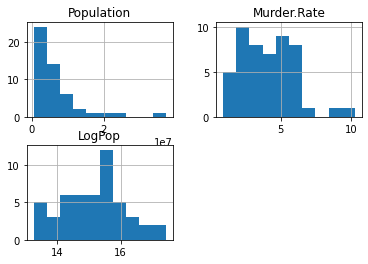

In [518]:
mydata.hist()

In [519]:
corr = mydata.corr()
corr

,Population,Murder.Rate,LogPop
Population,1.000000,0.182069,0.833394
Murder.Rate,0.182069,1.000000,0.308170
LogPop,0.833394,0.308170,1.000000


<AxesSubplot:>

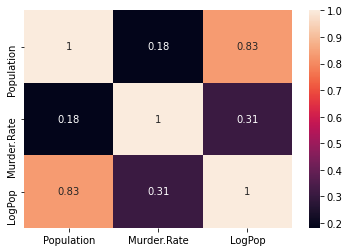

In [520]:
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='State', ylabel='Murder.Rate'>

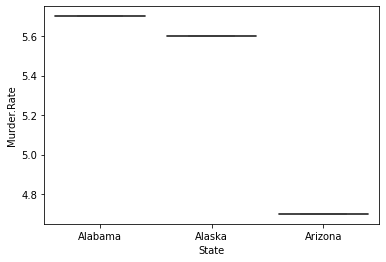

In [521]:
sns.boxplot(x="State", y="Murder.Rate", data=mydata[0:3])

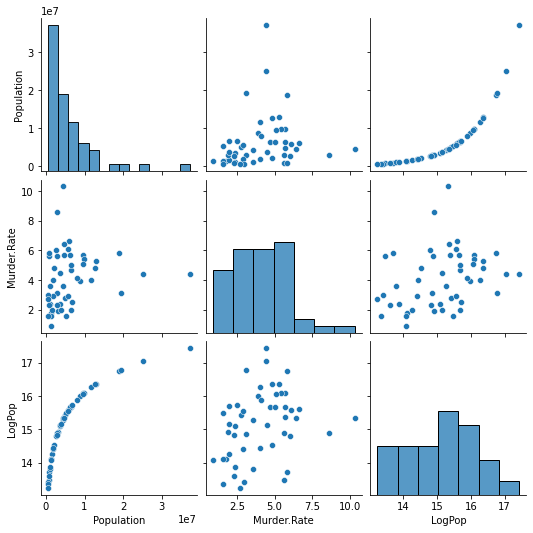

In [522]:
sns.pairplot(mydata)

In [523]:
mydata_nr = mydata[['Murder.Rate','Population']]

In [524]:
mydata_nr.head()

,Murder.Rate,Population
0,5.7,4779736
1,5.6,710231
2,4.7,6392017
3,5.6,2915918
4,4.4,37253956


In [525]:
#Linear regression

In [526]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = mydata['Murder.Rate']
y = mydata['LogPop']

In [527]:
regr.fit(x.values.reshape(-1, 1),y)
regr.coef_, regr.intercept_

(array([0.16406808]), 14.484815928231948)

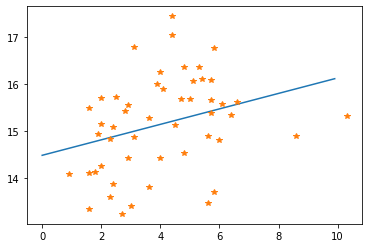

In [528]:
xx = np.arange(0,10,0.1)
yy = np.arange(0,10,0.1)*regr.coef_ + regr.intercept_
plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.show()

# DISTRIBUTIONS

In [529]:
# Bionomial distribution
N = 7 #trials
P = 0.6 #probability of occuring
y = np.arange(0,8)

In [530]:
z = []
import math
for x in y:
    prob = ( ( math.factorial(N) ) / ( (math.factorial(x)) * (math.factorial(N-x)) ) ) * (P**x) * ( (1-P)**(N-x) )
    z.append(prob)
    print(prob)
z = np.array(z)  

0.0016384000000000006
0.01720320000000001
0.07741440000000002
0.193536
0.29030400000000006
0.2612736
0.13063679999999997
0.027993599999999993


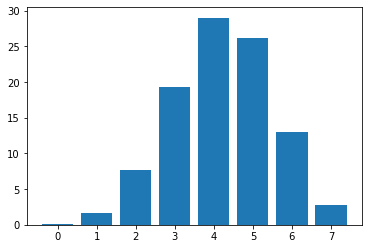

In [531]:
plt.bar(y,z*100)
plt.show()

In [532]:
N = 7
p = 0.6
k = np.arange(0,8)
binomial = stats.binom.pmf(k,N,p)
binomial

array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

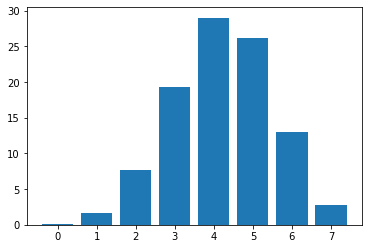

In [533]:
plt.bar(k,binomial*100)
plt.show()

In [534]:
# Poisson Distribution
lam = 6
n = np.arange(0,20)
poisson = stats.poisson.pmf(n,lam)

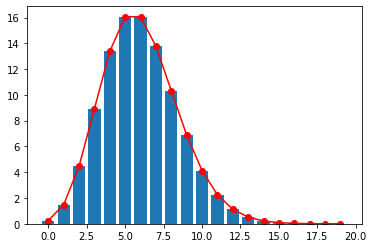

In [535]:
plt.bar(n,poisson*100)
plt.plot(n,poisson*100, color="r", marker="o")
plt.show()

In [536]:
x = stats.norm.rvs(loc=10, scale=10, size=10, random_state=None)
x

array([13.10405856, 13.87681172, 20.20396929, -3.24045555, -4.23500567,
        0.79598464, -4.80344409, 11.00064609, -6.29704002, 12.04165536])

In [537]:
1-stats.norm.cdf(15, loc=10, scale=10)

0.3085375387259869

# Inferential Statistics

In [538]:
# Central limit theorem as example the expenential distribution
# Third theorem
from numpy import random

sample_size = 5000
mean = []
y = np.arange(0,20001)
for x in y:
    z = random.exponential(scale=2, size=(sample_size, 1))
    mean.append(np.mean(z))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

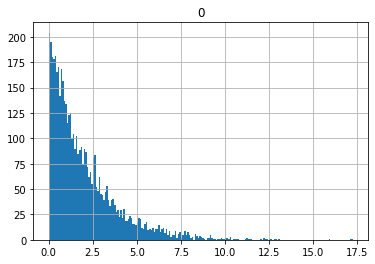

In [539]:
expo = pd.DataFrame(z)
expo.hist(bins=200)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

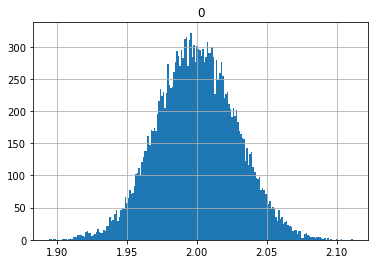

In [540]:
sample_mean = pd.DataFrame(mean)
sample_mean.hist(bins=200)

In [541]:
sample_mean.std(), expo.std()/np.sqrt(sample_size)  # Second theorem

(0    0.028381
 dtype: float64,
 0    0.027784
 dtype: float64)

In [542]:
expo.mean(), sample_mean.mean()  # First theorem

(0    1.999706
 dtype: float64,
 0    1.999985
 dtype: float64)

In [543]:
# The normal distribution
# If we know mean and std, what is the prob of x
def normaDist(X,mean,st):
    Z = (X-mean)/st # The Z score
    return ([stats.norm.sf(Z), stats.norm.cdf(Z)])  # The prob for x>X and for x<X

In [544]:
# From -x to x what is the prob. For std x must be n*1  
def cumulativeArea(x):
    x = np.abs(x)
    cdf_left = stats.norm.cdf(-x, loc=0, scale=1)
    cdf_right = stats.norm.cdf(x, loc=0, scale=1)
    return cdf_right - cdf_left
    

In [545]:
# The inverse problem. What is the std for x area of propability.
# For x*100 persent of the total area
def percentArea(x):
    y=(1-x)/2
    q_left=y
    q_right = x + y
    ppf_left = stats.norm.ppf(q_left, loc=0, scale=1)
    ppf_right = stats.norm.ppf(q_right, loc=0, scale=1)
    return (ppf_right-ppf_left)/2
    

In [546]:
# From -x to x what is the prob. For std x must be n*1  
def cumulativeAreaStudent(x,sampleSize):
    x = np.abs(x)
    cdf_left = stats.t.cdf(-x, sampleSize-1, loc=0, scale=1)
    cdf_right = stats.t.cdf(x, sampleSize-1, loc=0, scale=1)
    return cdf_right - cdf_left

In [547]:
# The inverse problem. What is the std for x area of propability.
# For x*100 persent of the total area
def percentAreaStudent(x,sampleSize):
    y=(1.0-x)/2.0
    q_left=y
    q_right = x + y
    ppf_left = stats.t.ppf(q_left, sampleSize-1, loc=0, scale=1)
    ppf_right = stats.t.ppf(q_right, sampleSize-1, loc=0, scale=1)
    return (ppf_right-ppf_left)/2.0

In [548]:
X = 0.973 # The value
mean = 0.693 # The mean
st = 0.333 # The std
normaDist(X,mean,st), percentArea(0.95), cumulativeArea(1.96)

([0.2002185519898444, 0.7997814480101556],
 1.959963984540054,
 0.950004209703559)

In [549]:
percentAreaStudent(0.90,16)

1.753050355692555

In [550]:
cumulativeAreaStudent(2.34,7)

0.942156059732985

# Confident interval

In [551]:
# Confidence Interval on the Mean
Sm = 49.0 #Sample mean
St = 4.0 #Sample std
Ss = 9 #Sample size
Cl = 0.99 #Confident limit

Merr = percentAreaStudent(Cl,Ss)*(St/np.sqrt(Ss)) # Margin error
Ll = Sm - Merr #Lower limit
Ul = Sm+ Merr #Upper limit
confInt = [Ll,Ul,Merr]
confInt

[44.52615022488881, 53.47384977511119, 4.473849775111193]

In [552]:
# Confident Interval on the Proportion
p = 0.52 #Sample proportion
Ss = 500 #Sample size
Cl = 0.95 #Confident limit

Sp = np.sqrt( (p*(1-p))/Ss ) #Std of p
DisToCon = 0.5/Ss # We are approximating a discrete distribution with a continuous distribution

Merr = percentArea(Cl)*Sp + DisToCon # Margin error
Ll = p - Merr #Lower limit
Ul = p + Merr #Upper limit
confInt = [Ll,Ul,Merr]
confInt

[0.47520894790838536, 0.5647910520916146, 0.044791052091614644]

In [553]:
# Confident interval on Difference between means
groupOne = pd.Series([3, 4, 5, 9 ,4, 0, 1, 3])
groupTwo = pd.Series([2, 4, 2, 5, 9])
Cl = 0.95 #Confident limit

M1 = groupOne.mean()
M2 = groupTwo.mean()
df = (groupOne.size -1) + (groupTwo.size -1)

def stdDM(groupOne,groupTwo,M1,M2):
    zOne = 0
    zTwo = 0
    for x in groupOne:
        s = x-M1
        zOne += s**2
    for x in groupTwo:
        s = x-M2
        zTwo += s**2    
    SSE = zOne + zTwo 
    df = (groupOne.size -1) + (groupTwo.size -1)
    MSE = SSE/df
    nn = (2/ ( (1/groupOne.size) + (1/groupTwo.size) ) )
    return np.sqrt((2*MSE)/nn)

Merr = percentAreaStudent(Cl,df+1)*stdDM(groupOne,groupTwo,M1,M2) # Margin error   
Ll = M1-M2 - Merr #Lower limit
Ul = M1-M2 + Merr #Upper limit
confInt = [Ll,Ul,Merr,M1,M2,stdDM(groupOne,groupTwo,M1,M2)]
confInt

[-4.26450183604449,
 2.7145018360444895,
 3.48950183604449,
 3.625,
 4.4,
 1.5854272438224801]

In [554]:
from statsmodels.stats.weightstats import CompareMeans
groupOne = pd.Series([3, 4, 5, 9 ,4, 0, 1, 3])
groupTwo = pd.Series([2, 4, 2, 5, 9])
CompareMeans.from_data(groupOne, groupTwo).tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(-4.26450183604449, 2.7145018360444895)

In [555]:
# Confident interval on the Correlation
Sr = -0.8 #Sample correlation
Ss = 40 #Sample size
Cl = 0.99 #Confident limit

def zDot(r):
    z = 0.5*np.log( (1+r)/(1-r) )
    return z
def zSTD(N):
    s = 1/(np.sqrt(N-3))
    return s
def zDotInverse(z):
    r = (np.exp(2*z)-1)/(np.exp(2*z)+1)
    return r

Merr = percentArea(Cl)*zSTD(Ss) # Margin error   
Ll = zDot(Sr) - Merr #Lower limit
Ul = zDot(Sr) + Merr #Upper limit
confInt = [zDotInverse(Ll),zDotInverse(Ul)]
confInt

[-0.9090587613184551, -0.5883563986749238]

In [556]:
# Testing a single Mean
# What is the two-tailed probability value testing the null hypothesis that the population mean is 0?
list = pd.Series([0.55, 0.91, 0.71, 0.86, 2.57, -0.30, -0.88, 1.55])
mean_pop = 0.5
std_pop = None

if std_pop == None:
    mean = list.mean()
    std = list.std()
    stdM = std/np.sqrt(list.size)
    t = (mean - mean_pop) / stdM
    p_value_two_tails = 1 - cumulativeAreaStudent(t,list.size)
    p_value_one_tail = p_value_two_tails/2
    prob = cumulativeAreaStudent(t,list.size)
else:
    mean = list.mean()
    stdM = std_pop/np.sqrt(list.size)
    z = (mean - mean_pop) / stdM
    p_value_two_tails = 1 - cumulativeArea(z)
    p_value_one_tail = p_value_two_tails/2
    prob = cumulativeArea(z) 
prob, p_value_two_tails, p_value_one_tail, t     

(0.46975645105765107,
 0.5302435489423489,
 0.26512177447117447,
 0.660197687676418)

# Null hypothesis

In [557]:
# Testing a single mean
# Null hypothesis, the population mean (μ) is 0
a = 0.05 #The significance level
population_mean = 0 # Null hypothesis
sample = pd.Series([5,22,-2,3,4,-2,6,18,11,-11,7,15,10,6,-1,5,-3,7,-3,5,1,8,12,-4])
tails_test = 1  # 1 -> one-tailed prob, 2 -> two-tailed prob

sample_mean = sample.mean()
sample_std = sample.std()
standard_error = sample_std/np.sqrt(sample.size)
t = (sample_mean - population_mean) / standard_error # how far from the mean into the t-distribution
p_value_two_tails = 1 - cumulativeAreaStudent(t,sample.size)
p_value_one_tail = p_value_two_tails/2
prob = cumulativeAreaStudent(t,sample.size)
#prob, p_value_two_tails, p_value_one_tail, t

if tails_test == 2 :
    if p_value_two_tails < a :
        print("The null hypothesis can be rejected. (Two-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (Two-tailed prob)")
else:
    if p_value_one_tail < a :
        print("The null hypothesis can be rejected. (One-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (One-tailed prob)")
    

The null hypothesis can be rejected. (One-tailed prob)


In [558]:
# Proportion Testing
p_pop = 0.6 # H0 the population proportion p = 0.7
q_pop = 1 - p_pop

n = 250 # The sample size
x = 170 # The survey
a = 0.05 #The significance level
tails_test = 1  # 1 -> one-tailed prob, 2 -> two-tailed prob

p_sam = x/n # The sample proportion
Z_a = percentArea(1-a)
Z_critical = (p_sam - p_pop) / np.sqrt( (p_pop*q_pop)/n ) 

if Z_critical<0:
    Z_critical = Z_critical - (0.5/n)
else:
    Z_critical = Z_critical + (0.5/n)

p_value_two_tails = 1 - cumulativeArea(Z_critical)
p_value_one_tail = p_value_two_tails/2

if tails_test == 2 :
    if p_value_two_tails < a :
        print("The null hypothesis can be rejected. (Two-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (Two-tailed prob)")
else:
    if p_value_one_tail < a :
        print("The null hypothesis can be rejected. (One-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (One-tailed prob)")


Z_a, Z_critical,  p_value_one_tail, p_value_two_tails    

The null hypothesis can be rejected. (One-tailed prob)


(1.959963984540054,
 2.583988897471613,
 0.004883246910836747,
 0.009766493821673494)

In [559]:
from statsmodels.stats.proportion import proportions_ztest
p_pop = 0.6 # the value of the proportion null hypothesis  
nobs = 250 # the number of trials or observations
count = 170 #the number of successes in nobs trials
#alt = "two-sided" # two-tailed prob
#alt = "smaller" # one-tailed prob on the left
alt = "larger" # one-tailed prob on the right
zstat, p_value = proportions_ztest(count, nobs, value=p_pop, alternative=alt, prop_var=False)
zstat, p_value

(2.7116307227332044, 0.003347656769375578)

In [560]:
# Testing Difference between two means. Independent Groups. (t-test)
# What is the two-tailed probability value p?
# The hypothesized value is the null hypothesis that the difference between population means is 0.

a = 0.05 #The significance level
tails_test = 2  # 1 -> one-tailed prob, 2 -> two-tailed prob
groupOne = pd.Series([3,4,5])
groupTwo = pd.Series([2,4])
mean_pop = 0.0

def stdDM(groupOne,groupTwo,M1,M2):
    zOne = 0
    zTwo = 0
    for x in groupOne:
        s = x-M1
        zOne += s**2
    for x in groupTwo:
        s = x-M2
        zTwo += s**2    
    SSE = zOne + zTwo 
    df = (groupOne.size -1) + (groupTwo.size -1)
    MSE = SSE/df
    nn = (2/ ( (1/groupOne.size) + (1/groupTwo.size) ) )
    return np.sqrt((2*MSE)/nn)



M1 = groupOne.mean()
M2 = groupTwo.mean()
stdM = stdDM(groupOne,groupTwo,M1,M2)
df = (groupOne.size -1) + (groupTwo.size -1)
t = (M1-M2 - mean_pop) / stdM
p_value_two_tails = 1 - cumulativeAreaStudent(t,df+1)
p_value_one_tail = p_value_two_tails/2
prob = cumulativeAreaStudent(t,df+1)

#prob, p_value_two_tails, p_value_one_tail, t 

if tails_test == 2 :
    if p_value_two_tails < a :
        print("The null hypothesis can be rejected. (Two-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (Two-tailed prob)")
else:
    if p_value_one_tail < a :
        print("The null hypothesis can be rejected. (One-tailed prob)")
    else:
        print("The null hypothesis can not be rejected. (One-tailed prob)")

The null hypothesis can not be rejected. (Two-tailed prob)


In [561]:
t, p_value_two_tails, df 

(0.948683298050514, 0.4127704262065395, 3)

In [562]:
from statsmodels.stats.weightstats import ttest_ind
groupOne = pd.Series([3,4,5])
groupTwo = pd.Series([2,4])
mean_pop = 0.0
t, p_value, df = ttest_ind(groupOne, groupTwo, alternative='two-sided', usevar='pooled', weights=(None, None), value=mean_pop)
t, p_value, df

(0.948683298050514, 0.4127704262065395, 3.0)

In [563]:
# Tukey two tails p value. Independent Groups.
# Assume you did an experiment with 3 groups and 16 subjects per group. 
# The sample variances in the three groups were 14, 16, and 18. 
# Using Tukey's test to compare the means, 
# what would be the two-tailed probability for a comparison of the first mean (14) with the last mean (18)?
sample_var = pd.Series([14,16,18])
MSE = sample_var.mean()
Q = (18 - 14)/np.sqrt( MSE/16 ) # Like t for the studentized range distribution
df = 3*16 -3 # Nr of freedom
k = 3 # Nr of groups
s_right = stats.studentized_range.cdf(Q, 3, 45, loc=0, scale=1)
s_left = stats.studentized_range.cdf(-Q, 3, 45, loc=0, scale=1)
two_tails_p = 1-s_right+s_left
two_tails_p

0.01872118679682777

In [564]:
# Perform Tukey’s Test
# All Pairwise Comparisons Among Means
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0158   1.4272 15.3728   True
     a      c      1.3 0.8864  -5.6728  8.2728  False
     b      c     -7.1 0.0453 -14.0728 -0.1272   True
-----------------------------------------------------


In [565]:
# Correlated t-test
groupOne = pd.Series([1804, 1919, 789, 1533, 990, 1603, 138, 1415, 1665, 434])
groupTwo = pd.Series([569, 1635, 767, 1155, 674, 707, 572, 1518, 174, 658])
m = 0 # The null hypothesies 
a = 0.05 # The significance level
tails_test = 2  # 1 -> one-tailed prob, 2 -> two-tailed prob

diff = []
for x in groupOne.index:
    xd = groupOne[x] - groupTwo[x]
    diff.append(xd)

diffOneTwo = pd.Series(diff)
sample_mean = diffOneTwo.mean()
sample_std = diffOneTwo.std()
t_critical = (sample_mean - m) / (sample_std/np.sqrt(groupOne.size))
p = 1 - cumulativeAreaStudent(t_critical,groupOne.size)
if tails_test == 2 :
    if p < a :
        print("The null hypothesis can be rejected. (Two-tailed prob)"+ " p-value {}".format(p/2))
    else:
        print("The null hypothesis can not be rejected. (Two-tailed prob)"+ " p-value {}".format(p))
else:
    if (p/2) < a :
        print("The null hypothesis can be rejected. (One-tailed prob)"+ " p-value {}".format(p/2))
    else:
        print("The null hypothesis can not be rejected. (One-tailed prob)" + " p-value {}".format(p/2))
        

The null hypothesis can not be rejected. (Two-tailed prob) p-value 0.08683314570809486


# Power

In [566]:
# The power of an independent t-test
from statsmodels.stats.power import TTestIndPower

groupOne = pd.Series([1804, 1919, 789, 1533, 990, 1603, 138, 1415, 1665, 434])
groupTwo = pd.Series([569, 1635, 767, 1155, 674, 707, 572, 1518, 174, 658])
mean_def = groupOne.mean() - groupTwo.mean()
est_std = np.sqrt( ( (groupOne.size - 1)*groupOne.std()**2 + (groupTwo.size - 1)*groupTwo.std()**2 ) / (groupOne.size + groupTwo.size - 2) )
effect_size = mean_def/est_std
nobs1 = groupOne.size
alpha = 0.05

analysis = TTestIndPower()
power = analysis.power(effect_size, nobs1, alpha, ratio=1, df=None, alternative='two-sided')
print("The power is {}".format(power))

The power is 0.33055616881907945


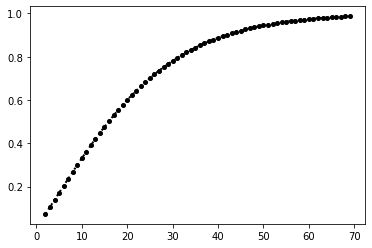

In [567]:
# Power versus sample size
from statsmodels.stats.power import TTestIndPower

groupOne = pd.Series([1804, 1919, 789, 1533, 990, 1603, 138, 1415, 1665, 434])
groupTwo = pd.Series([569, 1635, 767, 1155, 674, 707, 572, 1518, 174, 658])
mean_def = groupOne.mean() - groupTwo.mean()
est_std = np.sqrt( ( (groupOne.size - 1)*groupOne.std()**2 + (groupTwo.size - 1)*groupTwo.std()**2 ) / (groupOne.size + groupTwo.size - 2) )
effect_size = mean_def/est_std
alpha = 0.05

nobs1 = np.arange(2,70)
analysis = TTestIndPower()

pow = []
for x in nobs1:
    power = analysis.power(effect_size, x, alpha, ratio=1, df=None, alternative='two-sided')
    pow.append(power)
plt.plot(nobs1, np.array(pow),".:k", ms=8, lw=2)    

In [568]:
# The sample size for a power=0.8 of an independent t-test
from statsmodels.stats.power import TTestIndPower

groupOne = pd.Series([1804, 1919, 789, 1533, 990, 1603, 138, 1415, 1665, 434])
groupTwo = pd.Series([569, 1635, 767, 1155, 674, 707, 572, 1518, 174, 658])

mean_def = groupOne.mean() - groupTwo.mean()
est_std = np.sqrt( ( (groupOne.size - 1)*groupOne.std()**2 + (groupTwo.size - 1)*groupTwo.std()**2 ) / (groupOne.size + groupTwo.size - 2) )
effect_size = mean_def/est_std
#nobs1 = groupOne.size

alpha = 0.05
power = 0.8

analysis = TTestIndPower()
nobs = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')
print("The sample size is {}".format(nobs))

The sample size is 31.41109476496277


# Anova

In [569]:
# One-Way anova
# All the columns (every sample) has to be in a row 

data = np.array([[2.5,5.5,6.5,3.5,3,3.5,6,5,4,4.5,5,5.5,3.5,6,6.5,3,8,6.5,8,6,6,3,7,8,4,3,2.5,8,4.5,5.5,7.5,6,9,6.5],
[7,3,6,4.5,3.5,4,3,3,3.5,4.5,7,5,5,7.5,2.5,5,5.5,5.5,5,4,5,6.5,6.5,7,3.5,5,3.5,9,2.5,8.5,3.5,4.5,3.5,4.5],
[5.5,4,4,5,6,3.5,3.5,3.5,4,5.5,5.5,4.5,2.5,5.5,4.5,3,3.5,8,5,7.5,8,4,5.5,6.5,5,4,3,5,4,4,6,8,4.5,5.5],
[2,4,4,3,6,4.5,2,6,3,3,4.5,8,4,5,3.5,4.5,6.5,3.5,4.5,4.5,2.5,2.5,4.5,2.5,6,6,2,4,5.5,4,2.5,2.5,3,6.5]])

a = 0.05

dataList = pd.DataFrame(np.transpose(data), columns=["a","b","c","d"])
grand_mean = dataList.mean().mean()
dataListT = dataList.T

n = dataList.shape[0]
m = dataList.shape[1]
sst_d = m*n -1
ssw_d = m*(n-1)
ssb_d = m-1

sst_01 = []
ssw_01 = []
ssb_01 = []  
for x in dataListT.index:
    #print(dataList.mean()[x])
    for y in dataListT.columns:
        z_01 = (dataListT.loc[x,y] - grand_mean)**2  # The square power of each score minus grand mean
        z_02 = (dataListT.loc[x,y] - dataList.mean()[x])**2
        z_03 = (dataList.mean()[x] - grand_mean)**2
        sst_01.append(z_01)
        ssw_01.append(z_02)
        ssb_01.append(z_03)
sst_02 = pd.Series(sst_01)
ssw_02 = pd.Series(ssw_01)
ssb_02 = pd.Series(ssb_01)
sst = sst_02.sum() # THE TOTAL VARIATION as a sum of the square power of each score minus grand mean
ssw = ssw_02.sum() # TΗΕ SUM OF SQUARES ERROR
ssb = ssb_02.sum() # # THE SUM OF SQUARES CONDITION

#sst, ssw, ssb, sst_d, ssw_d, ssb_d
dfn = ssb_d
dfd = ssw_d
f_statistic = (ssb/ssb_d)/(ssw/ssw_d)
f_critical = stats.f.isf(a, dfn, dfd, loc=0, scale=1)


cdf_left = stats.f.cdf(-f_statistic, dfn, dfd, loc=0, scale=1)
cdf_right = stats.f.cdf(f_statistic, dfn, dfd, loc=0, scale=1)
p_value =1- cdf_right - cdf_left

if f_statistic > f_critical:
    print("The null hypothesis can be rejected. The p_value is {}".format(p_value))
else:
    print("The null hypothesis can not be rejected. The p_value is {}".format(p_value))
sst, ssw, ssb, sst_d, ssw_d, ssb_d, f_statistic, f_critical, p_value 

The null hypothesis can be rejected. The p_value is 0.01820073122157906


(377.18933823529414,
 349.65441176470586,
 27.534926470588243,
 135,
 132,
 3,
 3.4649548924358102,
 2.6732178312584347,
 0.01820073122157906)

In [570]:
#Test for normality. Normality Test
# Shapiro-Wilk normality test 
import scipy.stats as stats

stats.shapiro(dataList.a), stats.shapiro(dataList.b), stats.shapiro(dataList.c), stats.shapiro(dataList.d)
# If all p values are greater than threshold a = 0.05,
# we "fail to reject" the null hypothesis that samples are coming from populations that follow normal distribution

(ShapiroResult(statistic=0.9524224996566772, pvalue=0.14510247111320496),
 ShapiroResult(statistic=0.940691351890564, pvalue=0.06464379280805588),
 ShapiroResult(statistic=0.9276392459869385, pvalue=0.026717307046055794),
 ShapiroResult(statistic=0.9425297379493713, pvalue=0.07334727048873901))

In [571]:
# Test for variance criteria. Variance Test
# Levene variance test  
stats.levene(dataList.a, dataList.b, dataList.c, dataList.d)
# If p value is greater than threshold a = 0.05, 
# we "fail to reject" the null hypothesis that samples come from populations with the same variance.

LeveneResult(statistic=0.9772270596115206, pvalue=0.40562668588255435)

In [572]:
# Test for independent samples. Correlation Test
from scipy.stats import pearsonr
a = 0.05
p_value = []
for x in dataList.columns:
    for y in dataList.columns:
        if x!=y:
            stat, p = pearsonr(dataList[x], dataList[y])
            p_value.append(p)
for x in p_value:
    if x<a:
        print("The condition independent samples is not true")
        break

In [573]:
#One-way ANOVA
a = 0.05
F, p = stats.f_oneway(dataList.a, dataList.b, dataList.c, dataList.d)
if p < a:
    print("The null hypothesis can be rejected. The p_value is {}".format(p))
else:
    print("The null hypothesis can not be rejected. The p_value is {}".format(p))

The null hypothesis can be rejected. The p_value is 0.01820073122157926


In [574]:
# Perform Tukey’s Test
#create DataFrame to hold data
df = pd.DataFrame({'score': np.reshape(data,-1),
                   'group': np.repeat(['a', 'b', 'c', "d"], repeats=34)}) 
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey)
#This further indicates that there are statistically significant differences between groups a and d

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b  -0.4559 0.6382 -1.4831  0.5713  False
     a      c  -0.4559 0.6382 -1.4831  0.5713  False
     a      d    -1.25 0.0102 -2.2772 -0.2228   True
     b      c      0.0    0.9 -1.0272  1.0272  False
     b      d  -0.7941 0.1889 -1.8213  0.2331  False
     c      d  -0.7941 0.1889 -1.8213  0.2331  False
----------------------------------------------------


# Chi Square test

In [575]:
# Chi square distribution
df = 3
x = 9
q = 0.97
Chi_pdf = stats.chi2.pdf(x, df, loc=0, scale=1) # Probability density function
Chi_cdf = stats.chi2.cdf(x, df, loc=0, scale=1) # Cumulative distribution function
Chi_sf = stats.chi2.sf(x, df, loc=0, scale=1) # Survival function
Chi_isf = stats.chi2.isf(q, df, loc=0, scale=1) # Inverse survival function
Chi_pdf, Chi_cdf, Chi_sf, Chi_isf

(0.013295545235814032,
 0.9707091134651118,
 0.02929088653488826,
 0.24509870871029799)

In [576]:
# Contingency Tables
Women = [10, 14, 10]
Men = [11, 8, 4]
columns=["NS", "SS", "H"]
index=["Women","Men"]

In [577]:
Table = pd.DataFrame([Women,Men], columns=["NS", "SS", "H"], index=["Women","Men"])
Total=pd.DataFrame(Table.sum(), columns=["Total"])
Table = Table.append(Total.T)
Table["Total"] = Table.T.sum()
Table

,NS,SS,H,Total
Women,10,14,10,34
Men,11,8,4,23
Total,21,22,14,57


In [578]:
EF = [] #Expected Frequencies
for i in range(Table.shape[0]-1):
    for j in range(Table.shape[1]-1):
        EF.append( (Table.Total[i]*Table.iloc[Table.shape[0]-1,j])/Table.Total[Table.shape[0]-1] )

        
newarr = np.array_split(EF, 2)
chi = np.sum( (newarr[0]-Women)**2/newarr[0] ) + np.sum( (newarr[1]-Men)**2/newarr[1] )
df = (Table.shape[0]-2)*(Table.shape[1]-2)

p_value = stats.chi2.sf(chi, df, loc=0, scale=1)
p_value, chi, df

(0.330367456565817, 2.2150994785265894, 2)

In [579]:
# One-way
f_obs = [8, 5, 9, 2, 7, 5]
f_exp = [6, 6, 6, 6, 6, 6]

stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=5.333333333333334, pvalue=0.3765676447089763)